In [435]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.preprocessing import StandardScaler



In [436]:
datos_originales_conjunto_1 = pd.read_csv('X_modificado.csv', index_col=0)
datos_originales_conjunto_1

,Date,Price
0,1988-06-27,15.10
1,1988-06-28,15.27
2,1988-06-29,15.47
3,1988-06-30,14.85
4,1988-07-01,14.60
...,...,...
9139,2024-03-28,87.48
9140,2024-04-01,87.42
9141,2024-04-02,88.92
9142,2024-04-03,89.35


In [437]:
df = datos_originales_conjunto_1
# Convertir la columna 'fecha' a tipo datetime
df['Date'] = pd.to_datetime(df['Date'])




In [438]:
# las fechas están en desorden. Las ordenamos desde la "menor" fecha a la "mayor" (recordadndo que es DateTime)
df = df.sort_index()
# convertimos la columna 'Date' en el índice del DataFrame
df.set_index('Date', inplace=True)
df.dtypes

Price    float64
dtype: object

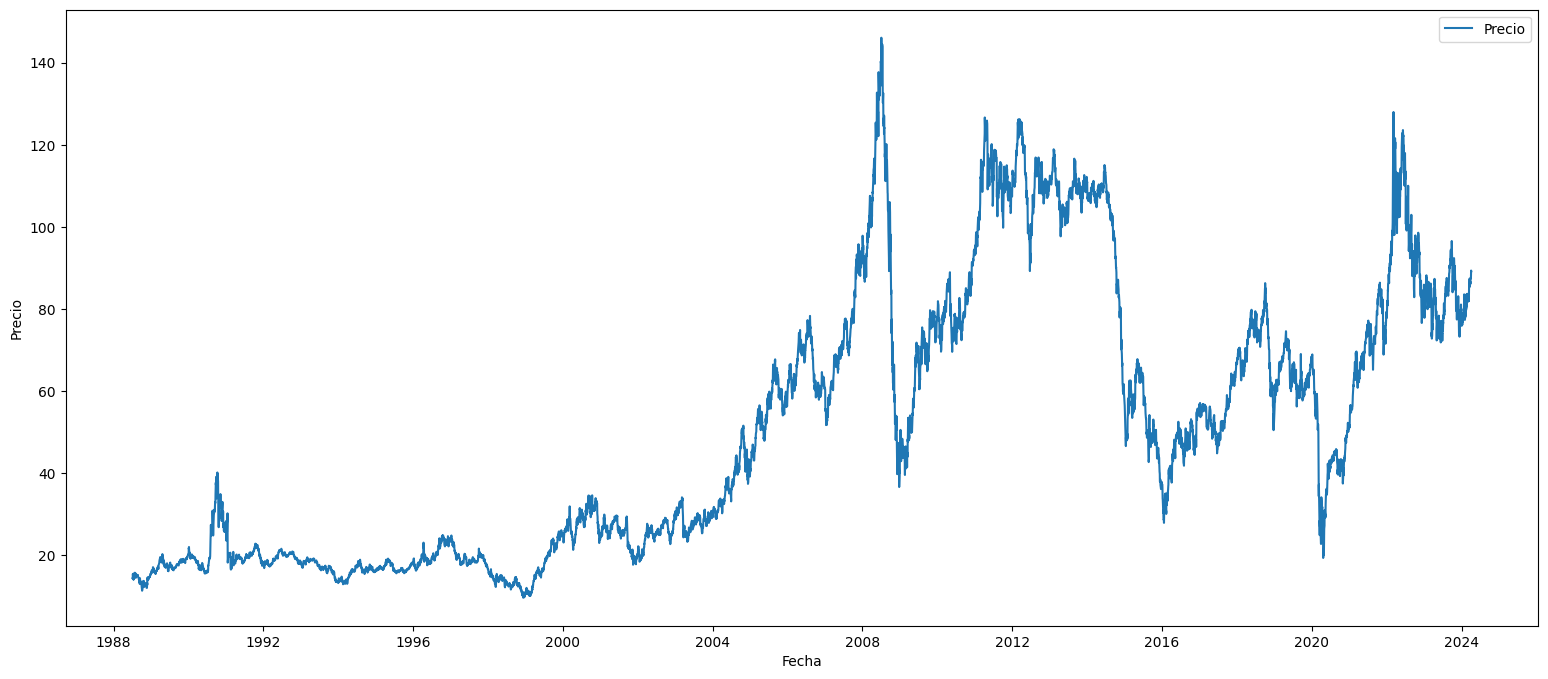

In [460]:
plt.figure(figsize=(19, 8))
plt.plot(df['Price'], label='Precio')
plt.title('')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.show()

Error cuadrático medio (MSE): 5.119443477981601


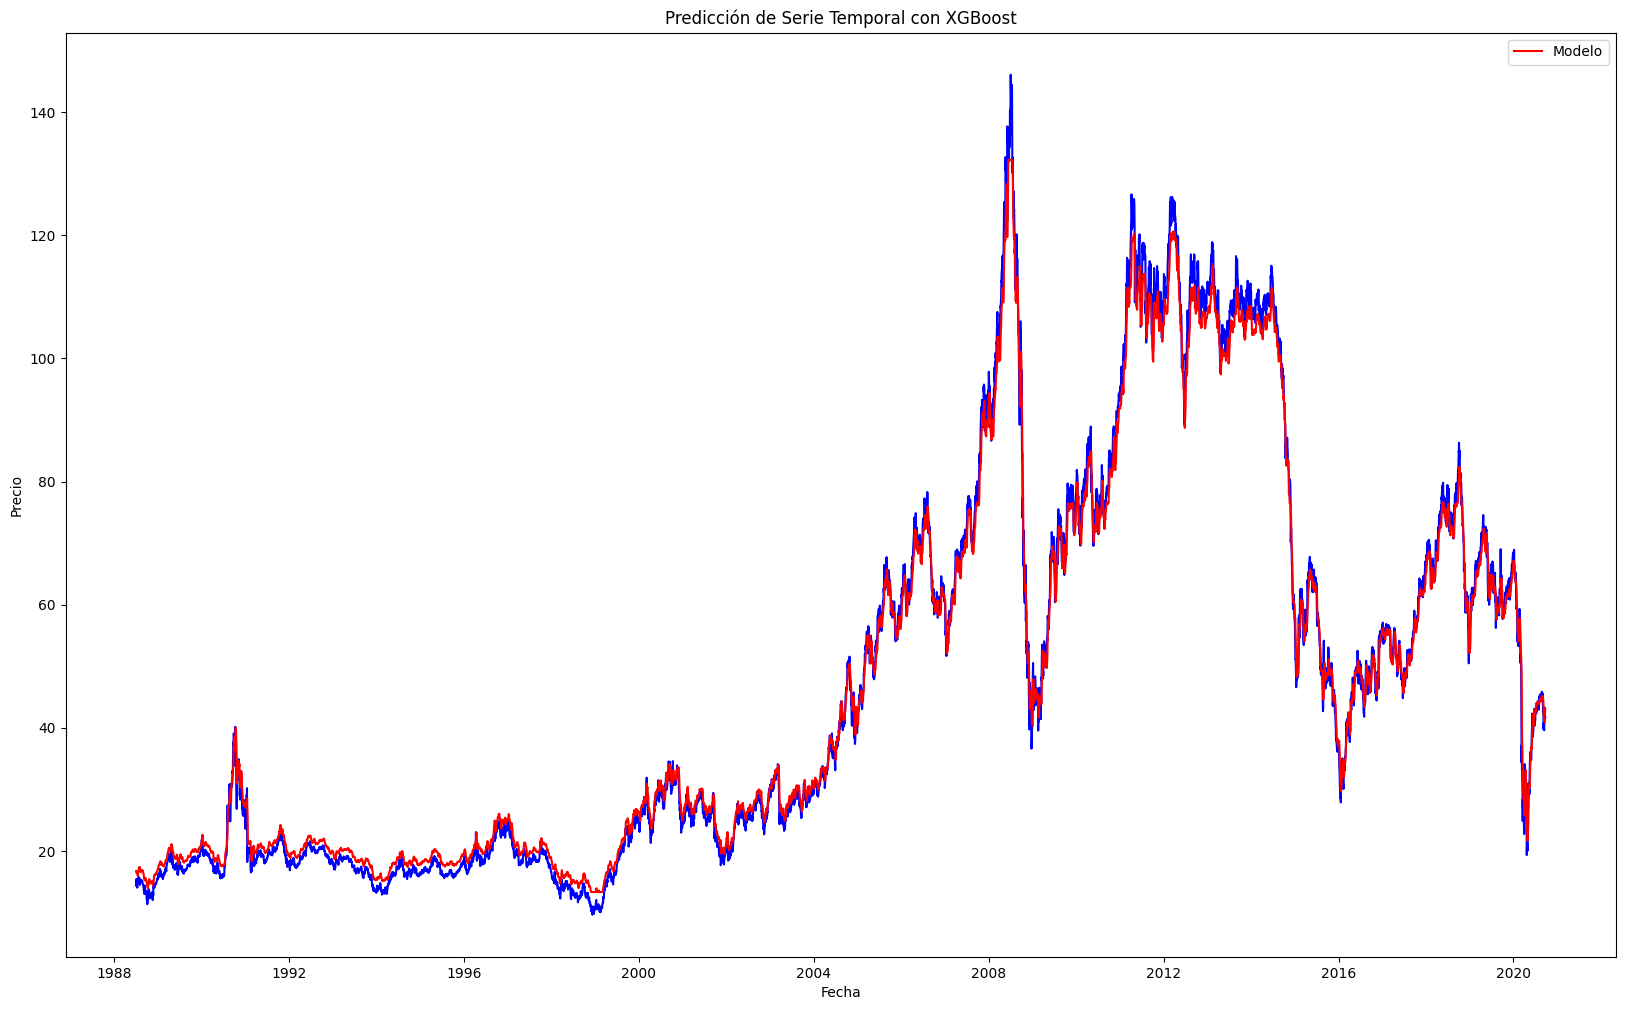

In [440]:
# Crear características de serie temporal (lag features)
def create_lag_features(df, lags=5):
    for lag in range(1, lags + 1):
        df[f'lag_{lag}'] = df['Price'].shift(lag)
    df = df.dropna()  # Eliminar filas con valores nulos
    return df

# Crear características de lag
df = create_lag_features(df, lags=5)

# Dividir los datos en conjunto de entrenamiento y prueba
train_size = int(len(df) * 0.9)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Separar las características (X) y el target (y)
X_train = train.drop(columns=['Price'])
y_train = train['Price']
X_test = test.drop(columns=['Price'])
y_test = test['Price']

# Estandarizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo XGBoost
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=3000, max_depth=4, learning_rate=0.001, colsample_bytree=0.3, reg_alpha=0.1, reg_lambda=0.1)

# Entrenar el modelo
model.fit(X_train_scaled, y_train)

# testar el modelo
y_pred = model.predict(X_test_scaled)


# Hacer predicciones
predictions = model.predict(X_train_scaled)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_train, predictions)
print(f"Error cuadrático medio (MSE): {mse}")

# Graficar las predicciones y los valores reales
plt.figure(figsize=(20, 12))
plt.plot(train.index, y_train, label='', color='blue')
plt.plot(train.index, predictions, label='Modelo', color='red')
plt.title('Predicción de Serie Temporal con XGBoost')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.show()


In [441]:
import statsmodels.api as sm
# prediction para ser citado como predictions['Price']
# nombrar la columna de las predicciones como 'Price'

# graficar solamente los 1000 ultimos valores de todos los dataframes
# usar dataframes anteriores para saber el intervalo de confianza
#X_train = train.drop(columns=['Price'])
X_train = sm.add_constant(X_train)
y_train = train['Price']


predictions = pd.DataFrame(predictions, columns=['Price'])


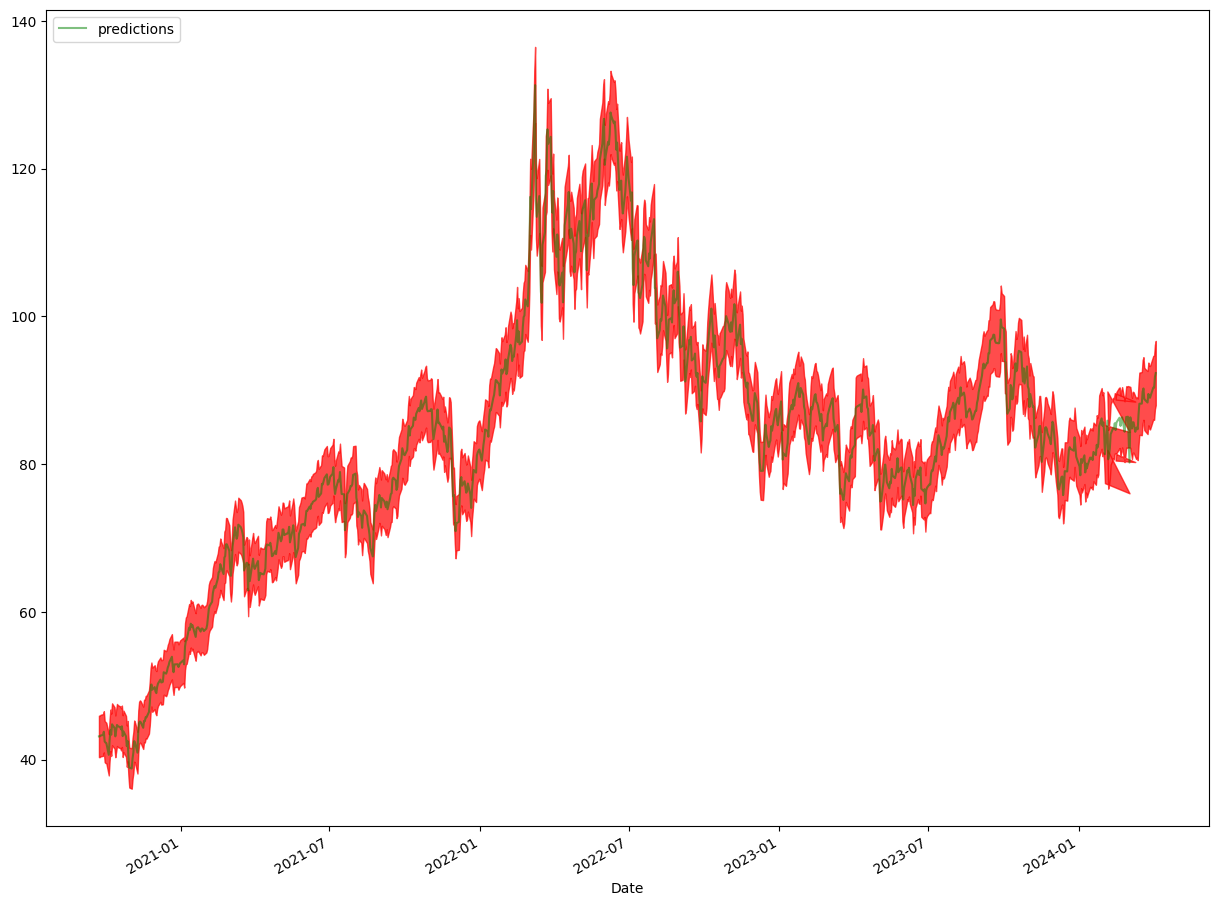

In [442]:



# usar el dataframe predictions para calcular el intervalo de confianza
model = sm.OLS(y_train, X_train).fit()
prediccion = model.get_prediction(test)
# crear un dataset que tenga la columna 'Price' con las predicciones
prediccion = prediccion.summary_frame(alpha=0.05)

# renombrar la columna mean a 'Price'
prediccion = prediccion.rename(columns={'mean': 'Price'})
# renombrar la columna obs_ci_lower a 'lower_bound'
prediccion = prediccion.rename(columns={'obs_ci_lower': 'lower_bound'})
# renombrar la columna obs_ci_upper a 'upper_bound'
prediccion = prediccion.rename(columns={'obs_ci_upper': 'upper_bound'})
# seleccionar solamente las columnas 'Price', 'lower_bound' y 'upper_bound'
prediccion = prediccion[['Price', 'lower_bound', 'upper_bound']]


# Graficar las predicciones y el intervalo de confianza

fig, ax = plt.subplots(figsize=(15, 12))
prediccion['Price'].plot(ax=ax, label='predictions', color='green', alpha=0.5)
ax.fill_between(
    prediccion.index,
    prediccion['lower_bound'],
    prediccion['upper_bound'],
    color = 'red',
    alpha = 0.7
)
ax.legend(loc='upper left');

In [443]:
import skforecast
import sklearn
from xgboost import XGBRegressor
from sklearn.feature_selection import RFECV
from skforecast.recursive import ForecasterRecursive
from skforecast.recursive import ForecasterRecursive
from skforecast.direct import ForecasterDirect
from skforecast.model_selection import TimeSeriesFold
from skforecast.model_selection import bayesian_search_forecaster
from skforecast.model_selection import backtesting_forecaster
from skforecast.feature_selection import select_features
from skforecast.preprocessing import RollingFeatures
import shap

In [444]:


print(f"Train dates : {train.index.min()} --- {train.index.max()}  (n={len(train)})")
print(f"Test dates  : {test.index.min()} --- {test.index.max()}  (n={len(test)})")

Train dates : 1988-07-04 00:00:00 --- 2020-09-22 00:00:00  (n=8225)
Test dates  : 2020-09-23 00:00:00 --- 2024-04-04 00:00:00  (n=914)


Claro, a continuación te proporciono el **Numeral 3** en formato Markdown compatible con **Obsidian**, incluyendo la ecuación en LaTeX para que puedas copiarla fácilmente.

---

## 3. Fórmula para Calcular el Intervalo de Predicción en Regresión Lineal

En el contexto de la **regresión lineal simple** (una variable independiente), la fórmula para el intervalo de predicción para una nueva observación \( y_{\text{new}} \) dada una nueva \( x_{\text{new}} \) es:

$$
\hat{y}_{\text{new}} \pm t_{\alpha/2, n-2} \cdot s \sqrt{1 + \frac{1}{n} + \frac{(x_{\text{new}} - \bar{x})^2}{\sum_{i=1}^{n}(x_i - \bar{x})^2}}
$$

**Donde:**
- \( \hat{y}_{\text{new}} \): Valor predicho de \( y \) para \( x_{\text{new}} \).
- \( t_{\alpha/2, n-2} \): Valor crítico de la distribución t de Student para un nivel de confianza \( 1 - \alpha \) y \( n-2 \) grados de libertad.
- \( s \): Error estándar de la estimación.
- \( n \): Número de observaciones en el modelo.
- \( \bar{x} \): Media de las observaciones de \( x \).
- \( x_i \): Observaciones individuales de \( x \).

---

### Explicación de la Fórmula

1. **Valor Predicho (\( \hat{y}_{\text{new}} \))**:
   - Se obtiene utilizando la ecuación de la regresión lineal:
     $$
     \hat{y}_{\text{new}} = \beta_0 + \beta_1 x_{\text{new}}
     $$
   - Donde \( \beta_0 \) es el intercepto y \( \beta_1 \) es la pendiente de la línea de regresión.

2. **Valor Crítico \( t \)**:
   - Se determina a partir de una tabla de la distribución t de Student, basándose en el nivel de confianza deseado (por ejemplo, 95%) y los grados de libertad (\( n-2 \)).

3. **Error Estándar de la Estimación (\( s \))**:
   - Representa la desviación típica de los residuos y se calcula a partir de los datos del modelo de regresión.

4. **Componentes dentro de la Raíz Cuadrada**:
   - **\( 1 \)**: Representa la incertidumbre inherente en la predicción.
   - **\( \frac{1}{n} \)**: Captura la incertidumbre en la estimación de la media de \( y \).
   - **\( \frac{(x_{\text{new}} - \bar{x})^2}{\sum_{i=1}^{n}(x_i - \bar{x})^2} \)**: Ajusta la predicción basada en la distancia de \( x_{\text{new}} \) respecto a la media de los valores de \( x \).

### Interpretación

El intervalo de predicción proporciona un rango en el cual se espera que caiga una futura observación individual de \( y \) para un valor específico de \( x_{\text{new}} \), con un nivel de confianza determinado (por ejemplo, 95%). Este intervalo es útil para entender la variabilidad esperada alrededor de la predicción del modelo.

### Consideraciones

- **Supuestos del Modelo**:
  - **Linealidad**: La relación entre \( x \) e \( y \) es lineal.
  - **Independencia**: Las observaciones son independientes entre sí.
  - **Homoscedasticidad**: La varianza de los errores es constante para todos los valores de \( x \).
  - **Normalidad de los Errores**: Los errores se distribuyen normalmente.

- **Importancia del Intervalo de Predicción**:
  - A diferencia del intervalo de confianza, que se enfoca en la media de la población, el intervalo de predicción se centra en una sola observación futura, lo que lo hace más amplio debido a la mayor incertidumbre asociada.

---

Espero que esta sección te sea de utilidad para calcular e interpretar los intervalos de predicción en tus análisis de regresión lineal. Si necesitas más ayuda o tienes alguna otra pregunta, ¡no dudes en preguntar!

In [445]:
'''==============================================================================
forecaster = ForecasterRecursive(
                 regressor = XGBRegressor(alpha=0.1, random_state=765),
                 lags      = 15
             )
forecaster.fit(y=train['Price'])

# Prediction intervals
# ==============================================================================
predictions = forecaster.predict_interval(
                  steps    = 100,
                  interval = [1, 99],
                  n_boot   = 500
              )
predictions.head(5)
'''

"==============================================================================\nforecaster = ForecasterRecursive(\n                 regressor = XGBRegressor(alpha=0.1, random_state=765),\n                 lags      = 15\n             )\nforecaster.fit(y=train['Price'])\n\n# Prediction intervals\n# ==============================================================================\npredictions = forecaster.predict_interval(\n                  steps    = 100,\n                  interval = [1, 99],\n                  n_boot   = 500\n              )\npredictions.head(5)\n"

In [446]:
df

,Price,lag_1,lag_2,lag_3,lag_4,lag_5
Date,,,,,,
1988-07-04,14.35,14.60,14.85,15.47,15.27,15.10
1988-07-05,14.30,14.35,14.60,14.85,15.47,15.27
1988-07-06,14.68,14.30,14.35,14.60,14.85,15.47
1988-07-07,15.45,14.68,14.30,14.35,14.60,14.85
1988-07-08,15.05,15.45,14.68,14.30,14.35,14.60
...,...,...,...,...,...,...
2024-03-28,87.48,86.09,86.25,86.75,85.43,85.78
2024-04-01,87.42,87.48,86.09,86.25,86.75,85.43
2024-04-02,88.92,87.42,87.48,86.09,86.25,86.75


---

In [447]:
# Create forecaster
# ==============================================================================
end_validation = '2023-12-09'

window_features = RollingFeatures(stats=["coef_variation"], window_sizes=8000)
forecaster = ForecasterRecursive(
                regressor       = XGBRegressor(n_estimators=3000,  random_state=15926, enable_categorical=True),
                lags            = 2000,
                window_features = window_features
             )

# Train forecaster
# ==============================================================================
forecaster.fit(y=df.loc[:end_validation, 'Price'])
forecaster

c:\Users\quint.LAPTOP-LGVR2QRN\anaconda3\lib\site-packages\skforecast\utils\utils.py:1157: UserWarning: Series has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
c:\Users\quint.LAPTOP-LGVR2QRN\anaconda3\lib\site-packages\skforecast\utils\utils.py:1157: UserWarning: Series has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


=================== 
ForecasterRecursive 
=================== 
Regressor: XGBRegressor 
Lags: [   1    2    3 ... 1998 1999 2000] 
Window features: ['roll_coef_variation_8000'] 
Window size: 8000 
Exogenous included: False 
Exogenous names: None 
Transformer for y: None 
Transformer for exog: None 
Weight function included: False 
Differentiation order: None 
Training range: [0, 9055] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: 
    {'objective': 'reg:squarederror', 'base_score': None, 'booster': None,
    'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None,
    'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None,
    'enable_categorical': True, 'eval_metric': None, 'feature_types': None,
    'gamma': None, 'grow_policy': None, 'importance_type': None,
    'interaction_constraints': None, 'learning_rate': None, 'max_bin': None,
    'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step':
    None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None,
    'missing': nan, 'monotone_constraints': None, 'multi_strategy': None,
    'n_estimators': 3000, 'n_jobs': None, 'num_parallel_tree': None,
    'random_state': 15926, 'reg_alpha': None, 'reg_lambda': None,
    'sampling_method': None, 'scale_pos_weight': None, 'subsample': None,
    'tree_method': None, 'validate_parameters': None, 'verbosity': None} 
fit_kwargs: {} 
Creation date: 2024-12-06 15:40:55 
Last fit date: 2024-12-06 15:43:53 
Skforecast version: 0.14.0 
Python version: 3.10.11 
Forecaster id: None

In [456]:
Date = pd.date_range(start='2023-12-10', end='2025-12-07', freq='D')

final = forecaster.predict(steps=(365*2-1))
# resetear el indice
final = final.reset_index()
# guardar juntos 'Date' y 'Price'
# agregar las fechas
final['Date'] = Date

# calcular desviacion estandar
final['std'] = final['pred'].std() 

final['lower_bound'] = final['pred'] - 0.5 * final['std']
final['upper_bound'] = final['pred'] + 0.5 * final['std']
final = final[['Date', 'pred', 'std', 'lower_bound', 'upper_bound']]



final.tail()

c:\Users\quint.LAPTOP-LGVR2QRN\anaconda3\lib\site-packages\skforecast\utils\utils.py:1219: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


,Date,pred,std,lower_bound,upper_bound
724,2025-12-03,98.539413,10.235041,93.421893,103.656934
725,2025-12-04,98.663284,10.235041,93.545764,103.780805
726,2025-12-05,98.772346,10.235041,93.654826,103.889867
727,2025-12-06,98.732254,10.235041,93.614734,103.849774
728,2025-12-07,98.597298,10.235041,93.479777,103.714818


In [458]:
# porcentaje de incertidumbre
final['incertidumbre'] = final['std'] / final['pred'] * 100
final

,Date,pred,std,lower_bound,upper_bound,incertidumbre
0,2023-12-10,76.321869,10.235041,71.204349,81.439389,13.410364
1,2023-12-11,76.222145,10.235041,71.104625,81.339665,13.427910
2,2023-12-12,76.202957,10.235041,71.085437,81.320477,13.431291
3,2023-12-13,76.659904,10.235041,71.542384,81.777425,13.351231
4,2023-12-14,74.895897,10.235041,69.778377,80.013417,13.665689
...,...,...,...,...,...,...
724,2025-12-03,98.539413,10.235041,93.421893,103.656934,10.386748
725,2025-12-04,98.663284,10.235041,93.545764,103.780805,10.373708
726,2025-12-05,98.772346,10.235041,93.654826,103.889867,10.362253
727,2025-12-06,98.732254,10.235041,93.614734,103.849774,10.366461


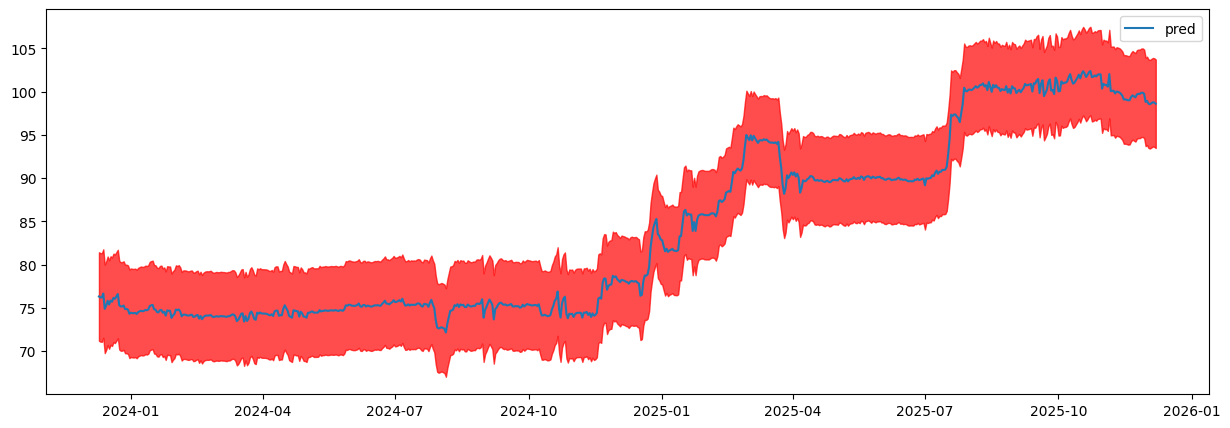

In [457]:
# graficar el 'pred' con los intervalos de confianza
plt.figure(figsize=(15, 5))
plt.plot(final['Date'], final['pred'], label='pred')
plt.fill_between(
    final['Date'],
    final['lower_bound'],
    final['upper_bound'],
    color = 'red',
    alpha = 0.7
)
plt.legend()
plt.show()


### predicción 2 años

In [450]:
'''
graficar SOLAMENTE las predicciones futuras
plt.figure(figsize=(10, 6))
plt.plot(future.index, future['Prediction'], label='Predicción Futura', color='red')
plt.title('Futuro de la materia prima X')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.show()
'''
final_2_anios = forecaster.predict(steps=730)
final_2_anios

c:\Users\quint.LAPTOP-LGVR2QRN\anaconda3\lib\site-packages\skforecast\utils\utils.py:1219: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


8000    76.321869
8001    76.222145
8002    76.202957
8003    76.659904
8004    74.895897
          ...    
8725    98.663284
8726    98.772346
8727    98.732254
8728    98.597298
8729    98.784386
Name: pred, Length: 730, dtype: float64

In [451]:
final_3_anios = forecaster.predict(steps=1095)
final_3_anios

c:\Users\quint.LAPTOP-LGVR2QRN\anaconda3\lib\site-packages\skforecast\utils\utils.py:1219: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


8000    76.321869
8001    76.222145
8002    76.202957
8003    76.659904
8004    74.895897
          ...    
9090    90.166794
9091    89.373062
9092    89.649155
9093    90.209641
9094    89.616440
Name: pred, Length: 1095, dtype: float64

---

---